In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig
%matplotlib inline

In [35]:
from scipy.stats import zscore
from scipy import stats

In [2]:
counts = pd.read_csv('CDA_R_analysis/deseq_norm_counts.csv')
counts.head()

,Unnamed: 0,GENEID,GENENAME,CDA_1,CDA_2,CDA_3,WT_1,WT_2,WT_3
0,ENSG00000000003,ENSG00000000003,TSPAN6,159.433663,235.555873,233.405004,169.659529,172.464278,133.169223
1,ENSG00000000005,ENSG00000000005,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,12.713815
2,ENSG00000000419,ENSG00000000419,DPM1,1491.531450,2017.750565,1313.397426,1633.917044,1761.442684,1516.178134
3,ENSG00000000457,ENSG00000000457,SCYL3,259.025602,326.183104,423.806734,402.446152,229.701109,354.899875
4,ENSG00000000460,ENSG00000000460,C1orf112,854.129275,1064.194157,1014.279511,1405.265478,1120.683096,1237.961496


In [4]:
counts.drop(columns=['Unnamed: 0','GENEID'], inplace=True)
counts.head()

,GENENAME,CDA_1,CDA_2,CDA_3,WT_1,WT_2,WT_3
0,TSPAN6,159.433663,235.555873,233.405004,169.659529,172.464278,133.169223
1,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,12.713815
2,DPM1,1491.531450,2017.750565,1313.397426,1633.917044,1761.442684,1516.178134
3,SCYL3,259.025602,326.183104,423.806734,402.446152,229.701109,354.899875
4,C1orf112,854.129275,1064.194157,1014.279511,1405.265478,1120.683096,1237.961496


In [6]:
counts.columns=['GENENAME','CDA','CDA','CDA','WT','WT','WT']
counts.head()

,GENENAME,CDA,CDA,CDA,WT,WT,WT
0,TSPAN6,159.433663,235.555873,233.405004,169.659529,172.464278,133.169223
1,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,12.713815
2,DPM1,1491.531450,2017.750565,1313.397426,1633.917044,1761.442684,1516.178134
3,SCYL3,259.025602,326.183104,423.806734,402.446152,229.701109,354.899875
4,C1orf112,854.129275,1064.194157,1014.279511,1405.265478,1120.683096,1237.961496


In [7]:
counts_m = counts.melt(id_vars='GENENAME')
counts_m.head()

,GENENAME,variable,value
0,TSPAN6,CDA,159.433663
1,TNMD,CDA,0.000000
2,DPM1,CDA,1491.531450
3,SCYL3,CDA,259.025602
4,C1orf112,CDA,854.129275


/var/folders/tw/xhynl16s0g994hp33hc2mn9r0000gn/T/ipykernel_43694/2628261297.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='variable',y='value', data = counts_m[counts_m.GENENAME == 'KLF1'], errorbar = 'sd', capsize=0.2, palette=['red','blue'])


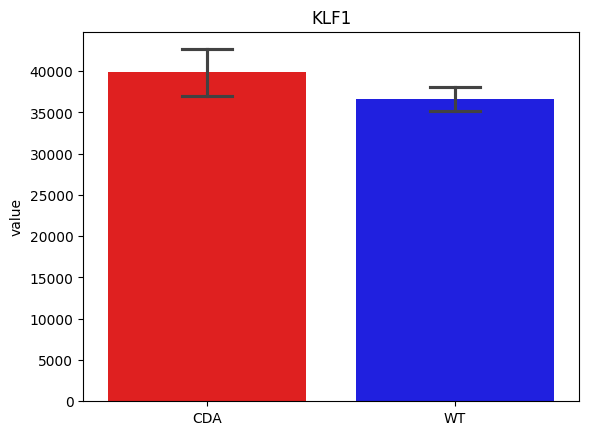

In [12]:
ax = sns.barplot(x='variable',y='value', data = counts_m[counts_m.GENENAME == 'KLF1'], errorbar = 'sd', capsize=0.2, palette=['red','blue'])
ax.set(xlabel='', title='KLF1')
ax.figure.savefig('KLF1.png', dpi=300, bbox_inches='tight')


In [13]:
up_genes = pd.read_csv('CDA_R_analysis/up_sig_cda_genes.csv')
up_genes.head()

,TUBA4A
0,APOE
1,CKB
2,AIM1
3,REEP6
4,S100A1


In [21]:
counts_heat = counts.copy()
counts_heat.set_index('GENENAME',inplace=True)
counts_heat.columns = ['CDA1','CDA2','CDA3','WT1','WT2','WT3']
counts_heat.sort_values('CDA1',ascending=False, inplace=True)
counts_heat.head()

,CDA1,CDA2,CDA3,WT1,WT2,WT3
GENENAME,,,,,,
HBG2,1.142087e+06,1.390409e+06,1.101377e+06,273010.163894,290838.891485,279089.860312
HBA1,7.447221e+05,6.902404e+05,7.053582e+05,764995.353683,759505.589149,741029.774843
HBA2,6.949860e+05,5.959480e+05,6.546444e+05,636654.805473,634466.097935,632712.333349
EEF1A1,5.451453e+05,6.037379e+05,5.365745e+05,822536.005231,828535.671776,849080.230966
MT-CO1,4.285583e+05,4.310330e+05,4.212190e+05,343964.519540,316191.163443,297582.428726


In [22]:
counts_heat.shape

(16460, 6)

In [47]:
counts_heat_scaled = counts_heat.head(5000)
counts_heat_scaled = counts_heat_scaled[(np.abs(stats.zscore(counts_heat_scaled)) < 3).all(axis=1)]
counts_heat_scaled.shape

(4969, 6)

In [41]:
counts_heat_scaled = counts_heat_scaled.apply(zscore)
counts_heat_scaled.head()

,CDA1,CDA2,CDA3,WT1,WT2,WT3
GENENAME,,,,,,
MT-ND2,11.296425,11.406858,11.378983,7.017468,6.509676,6.441494
TLN1,10.781372,9.564425,11.497659,5.171292,5.790962,5.152637
MT-CYB,10.450503,9.531059,10.900341,6.368813,5.722124,5.686585
MT-ND1,9.944263,9.268203,9.458143,5.742896,5.549429,4.983487
MT-ND5,9.846747,9.029108,9.783538,5.240133,4.835568,4.690307


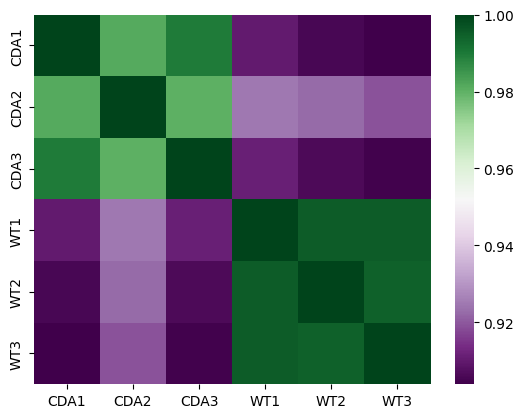

In [126]:
corrplot_counts = sns.heatmap(counts_heat_scaled.corr(), cmap = 'PRGn')
corrplot_counts.figure.savefig('corrplot.png', dpi=300, bbox_inches='tight')

In [49]:
counts_heat_scaled.tail(100)

,CDA1,CDA2,CDA3,WT1,WT2,WT3
GENENAME,,,,,,
ORAI2,1501.179997,648.044009,667.643589,255.710895,271.895420,294.005315
GLOD4,1501.054400,2389.076138,2282.978732,2889.556707,2793.458648,2092.121232
WDR41,1501.041594,1511.371284,1378.817545,1166.836209,1349.271897,1433.262126
AP1G2,1500.428449,1076.631866,1689.614019,1027.293332,1088.564436,1128.416718
MAX,1500.419271,1358.432048,1012.274049,1168.453881,675.426955,1815.630014
...,...,...,...,...,...,...
SURF1,1463.288584,1438.082922,1151.395100,1323.693846,1289.315343,1555.346624
AKAP10,1462.259664,1183.080761,2125.744447,848.674782,1456.662836,1017.918717
RPS6KA4,1461.442682,1072.117559,1525.275269,1619.563888,1578.306655,1559.297776


In [68]:
counts_heat = counts_heat.replace(0,1)

In [69]:
counts_heat.tail()

,CDA1,CDA2,CDA3,WT1,WT2,WT3
GENENAME,,,,,,
UBA52P6,1.0,6.968879,1.000000,13.854537,2.189910,1.024132
TFEB,1.0,16.362390,27.779521,14.074306,10.794459,18.445186
CCR6,1.0,33.363983,37.507886,16.073460,23.673586,1.000000
SLC39A7,1.0,53.553773,1.000000,1.000000,1.000000,1.000000
RP5-937E21.8,1.0,1.000000,1.000000,12.272540,1.000000,1.000000


In [75]:
# log-transformation
counts_hs = np.log2(counts_heat)

In [74]:
counts_hs.shape

(16460, 6)

/Users/biekerlab/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


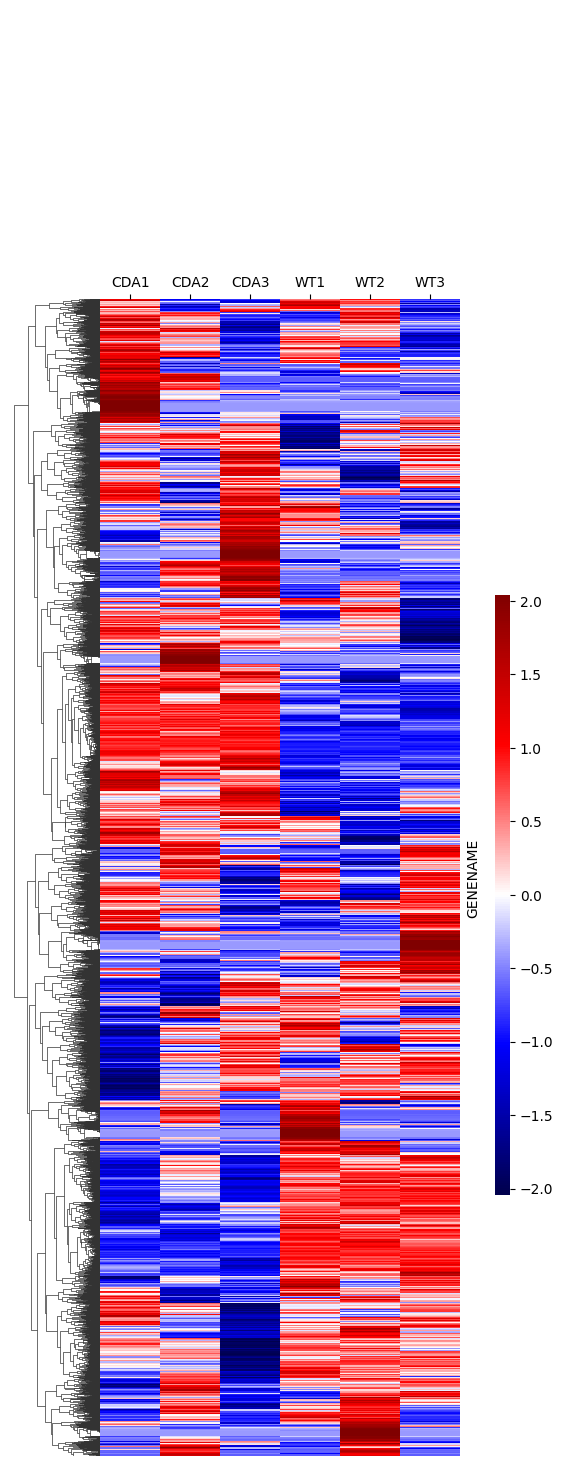

In [127]:
c_plot = sns.clustermap(counts_hs, z_score=0, figsize=(5,15), col_cluster=False, cmap='seismic', yticklabels=False, cbar_pos=(1, .2, .03, .4))
c_plot.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, labelrotation=0)
plt.show()
c_plot.figure.savefig('hcluster_heatmap.png', dpi=300, bbox_inches='tight')

In [80]:
counts_mouse = pd.read_csv('/Volumes/biekerlab_backup/Kevin/deseq_sig_mouse.csv')
counts_mouse.head()

,GENEID,GENENAME,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSMUSG00000102824,RP23-411B11.2,51.470661,-9.017680,1.286707,-7.008338,2.410000e-12,8.860000e-10
1,ENSMUSG00000116475,NaN,28.482260,-8.164026,1.357757,-6.012875,1.820000e-09,4.120000e-07
2,ENSMUSG00000074280,Gm6166,574.868569,-7.377659,1.030953,-7.156156,8.300000e-13,3.350000e-10
3,ENSMUSG00000044951,Mylk4,24.426521,-7.102076,1.753371,-4.050527,5.110000e-05,4.446449e-03
4,ENSMUSG00000099906,Gm28653,10.652769,-6.746857,1.821874,-3.703252,2.128540e-04,1.376386e-02


In [81]:
counts_mouse.shape

(465, 8)

In [ ]:
counts_mouse.drop(columns=['GENEID', 'baseMean', 'lfcSE', 'stat', 'pvalue', 'padj'], inplace=True)
counts_mouse.head()

In [87]:
counts_mouse.sort_values('log2FoldChange',ascending=False, inplace=True)
counts_mouse.head()

,GENENAME,log2FoldChange
464,NaN,20.003455
463,Rpl3-ps1,16.073543
462,Fam159b,13.853387
461,Tusc5,10.414127
460,NaN,10.013642


In [92]:
counts_hs_c = counts_hs.drop(columns=['WT1', 'WT2', 'WT3'])
counts_hs_c.head()

,CDA1,CDA2,CDA3
GENENAME,,,
HBG2,20.123242,20.407078,20.070877
HBA1,19.506343,19.396739,19.427997
HBA2,19.406624,19.184827,19.320352
EEF1A1,19.056281,19.203563,19.033419
MT-CO1,18.709132,18.717439,18.684211


In [93]:
counts_hs_c['log2FoldChange'] = counts_hs_c[['CDA1', 'CDA2', 'CDA3']].mean(axis=1)
counts_hs_c.head()

,CDA1,CDA2,CDA3,log2FoldChange
GENENAME,,,,
HBG2,20.123242,20.407078,20.070877,20.200399
HBA1,19.506343,19.396739,19.427997,19.443693
HBA2,19.406624,19.184827,19.320352,19.303934
EEF1A1,19.056281,19.203563,19.033419,19.097754
MT-CO1,18.709132,18.717439,18.684211,18.703594


In [94]:
counts_hs_c = counts_hs_c.drop(columns=['CDA1', 'CDA2', 'CDA3'])
counts_hs_c.head()

,log2FoldChange
GENENAME,
HBG2,20.200399
HBA1,19.443693
HBA2,19.303934
EEF1A1,19.097754
MT-CO1,18.703594


In [95]:
counts_mouse['GENENAME'] = counts_mouse['GENENAME'].str.upper()
counts_mouse.head()

,GENENAME,log2FoldChange
464,NaN,20.003455
463,RPL3-PS1,16.073543
462,FAM159B,13.853387
461,TUSC5,10.414127
460,NaN,10.013642


In [96]:
counts_mouse.set_index('GENENAME',inplace=True)
counts_mouse.head()

,log2FoldChange
GENENAME,
NaN,20.003455
RPL3-PS1,16.073543
FAM159B,13.853387
TUSC5,10.414127
NaN,10.013642


In [101]:
counts_mouse.rename(columns = {'log2FoldChange': 'log2FoldChange_NaN'}, inplace=True)
counts_hs_c.rename(columns = {'log2FoldChange': 'log2FoldChange_CDA'}, inplace=True)
counts_mouse.head()

,log2FoldChange_NaN
GENENAME,
NaN,20.003455
RPL3-PS1,16.073543
FAM159B,13.853387
TUSC5,10.414127
NaN,10.013642


In [102]:
merged_sig = pd.merge(counts_hs_c, counts_mouse, left_index=True, right_index=True)
merged_sig.head()

,log2FoldChange_CDA,log2FoldChange_NaN
GENENAME,,
SLC25A37,16.960828,-1.919208
SLC1A5,15.137044,-0.664027
DNAJA4,14.378445,-3.992769
PSAP,14.252102,2.024166
CAST,13.939682,-1.203308


In [105]:
merged_sig.to_csv('log_sig_compare.csv', index=True)